In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
from plotting import plot_learning_curve, plot_validation_curve



# Detecting Spam with Decision Trees

In the last assignment we worked with the spam database. We are going to do the same thing in this assignment and we will practice with the correct tools this time around. 

In [2]:
## we are going to hardcode the column names, because this just makes it a little easier to use pandas.

names = ['word_freq_make:        ',
'word_freq_address:     ',
'word_freq_all:         ',
'word_freq_3d:          ',
'word_freq_our:         ',
'word_freq_over:        ',
'word_freq_remove:      ',
'word_freq_internet:    ',
'word_freq_order:       ',
'word_freq_mail:        ',
'word_freq_receive:     ',
'word_freq_will:        ',
'word_freq_people:      ',
'word_freq_report:      ',
'word_freq_addresses:   ',
'word_freq_free:        ',
'word_freq_business:    ',
'word_freq_email:       ',
'word_freq_you:         ',
'word_freq_credit:      ',
'word_freq_your:        ',
'word_freq_font:        ',
'word_freq_000:         ',
'word_freq_money:       ',
'word_freq_hp:          ',
'word_freq_hpl:         ',
'word_freq_george:      ',
'word_freq_650:         ',
'word_freq_lab:         ',
'word_freq_labs:        ',
'word_freq_telnet:      ',
'word_freq_857:         ',
'word_freq_data:        ',
'word_freq_415:         ',
'word_freq_85:          ',
'word_freq_technology:  ',
'word_freq_1999:        ',
'word_freq_parts:       ',
'word_freq_pm:          ',
'word_freq_direct:      ',
'word_freq_cs:          ',
'word_freq_meeting:     ',
'word_freq_original:    ',
'word_freq_project:     ',
'word_freq_re:          ',
'word_freq_edu:         ',
'word_freq_table:       ',
'word_freq_conference:  ',
'char_freq_;:           ',
'char_freq_(:           ',
'char_freq_[:           ',
'char_freq_!:           ',
'char_freq_$:           ',
'char_freq_#:           ',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total: ',
'label']
          

In [3]:
## Load in the dataset here 

data = pd.read_csv('spambase/spambase.csv', names = names)  #Each column take sthe names defined in "names"
X = data.drop('label', axis = 1)                            #The data will be everything instead of 'Label' column
y = data.label                                              #y isthe 'label' column

In [4]:
# this time we will keep a bit more data for training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

## 1. Evaluate your classifier using 5 fold cross validation.


In [5]:
# create a default decision tree model
clf = DecisionTreeClassifier()

# create a stratifiedKfold cv object -- we want stratified to keep the class balance across folds
cv = StratifiedKFold(n_splits = 5)  # set it for 5 folds

# get the scores back using the helper function, make sure to pass a scoring function string - otherwise you default to accuracy
scores = cross_val_score( clf, X_train,y_train, cv=cv, scoring='f1')

In [6]:
print(scores)

[0.89482471 0.91065292 0.86910995 0.89824561 0.86941581]


In [7]:
type(scores)

numpy.ndarray

In [8]:
print(scores.mean())            #88.8% of score accuracy

0.8884497996095628


In [9]:
print(scores.std())     #1.65% deviation

0.016528150292611354


### Looking for variance in the runs

How much do the runs change over time? Let's run a for-loop and check.  In fact, that's exactly what shuffle split will do for us, so we can just run 100 iterations with 25% held out as validations - this will mimick 5-fold CV in the long run. 

In [10]:
sss_split = StratifiedShuffleSplit(n_splits =100 , test_size=.25) # fill in the params      We split all the training data in 100 parts and measure accuracy
scores_sss = cross_val_score(clf, X_train, y_train, cv= sss_split, scoring ='f1') # your code here

In [11]:
# print at your own risk!
print (scores_sss)

[0.86318759 0.8844086  0.90633609 0.85904255 0.89617486 0.87694484
 0.88429752 0.90641711 0.88919289 0.875513   0.86740331 0.89701897
 0.86036671 0.86344828 0.86263736 0.89408528 0.87912088 0.88275862
 0.87785235 0.8879892  0.88888889 0.87277702 0.89761571 0.89071038
 0.89430894 0.87798036 0.87832168 0.84615385 0.89674682 0.88734353
 0.87228261 0.87061995 0.89931034 0.8551532  0.88611111 0.85874126
 0.88435374 0.87771739 0.86538462 0.89256198 0.87777778 0.88308116
 0.87242798 0.88308116 0.87956698 0.89617486 0.875      0.88055556
 0.87449393 0.8840382  0.88333333 0.89349931 0.88978495 0.87362637
 0.89133425 0.88918919 0.88065844 0.86980609 0.86595174 0.87945205
 0.88053691 0.86944818 0.87804878 0.87619048 0.87087912 0.88227334
 0.86849315 0.88551724 0.88456189 0.87483176 0.87533875 0.88919289
 0.87517147 0.89041096 0.86376022 0.87483176 0.8824343  0.8952381
 0.88617886 0.8627451  0.89915966 0.85555556 0.88734353 0.85362517
 0.85598923 0.8952381  0.87585266 0.86206897 0.88736264 0.86312

In [12]:
scores_sss.mean()

0.8798851878415702

### Plotting a histogram of the runs

So we want to look for variance or variation in the runs. It's not easy to just look at a large list of scores and get any idea, so I will plot a histogram which should show us the distribution of results.

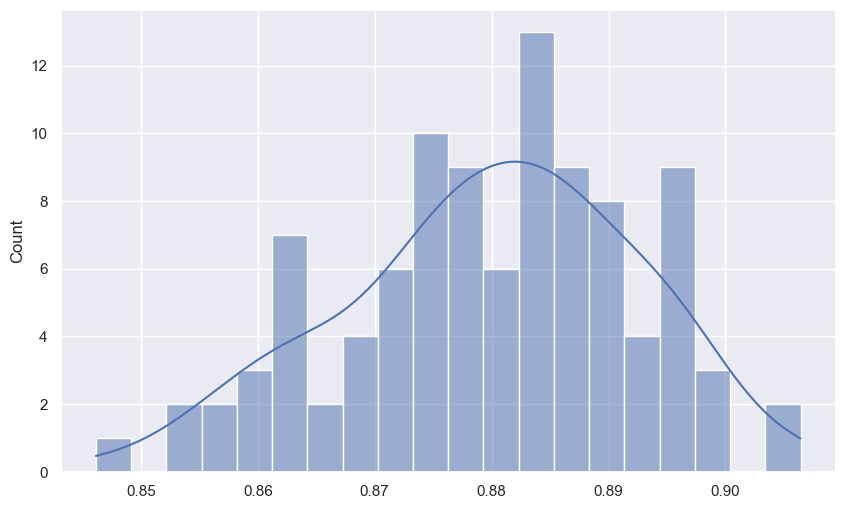

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(scores_sss, kde=True, bins=20);  

we can see in the distribution that the highest scores are in between 0.88 and 0.89.
In this model we split it in 100 parts and evaluate those models.

## 2. Tune your models hyper-parameters with Gridsearch

Choose at least **3** parameters with **3** values each (total **9**) to search over
When you create your GridSearchCV object make sure to set the following

1. cv object - which CV do you want to use? This will be run for every experiment, so if you do 100 sss, then you get 100 experiments for every parameter setting! This will add up fast. So make sure to choose something reasonable.
2. scoring parameter - never forget this!

If you don't set the above, GridSearchCV will default to kfold=5 for the CV and accuracy for the scoring parameter.  kfold=5 isn't the worst (stratifiedkfold is better for us), but accuracy is really wrong for this dataset since it's unbalanced and a spam dataset.



In [14]:
# you need to setup a paramgrid.  
params={'max_depth':[2,20,50],                          #looking for parameter search
        'min_samples_leaf':[2,20,50],
        'min_samples_split':[2,20,50]}

#param_grid = {'max_depth':[2,10,20,30]} # will check max depth for those four parameters.

In [15]:
## make a gridsearch object and pass all the needed parameters.
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params, scoring='f1',
                    cv=StratifiedKFold(n_splits=5),n_jobs=-1)

In [16]:
# fit your grid-search! - it's an estimator so you fit it like a normal model.
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 20, 50],
                         'min_samples_leaf': [2, 20, 50],
                         'min_samples_split': [2, 20, 50]},
             scoring='f1')

## 2.1: Gridsearch Results 

1. What are the final parameters that were best?  (grid.best_params_)
2. What was your models best score? (grid.best_score_)
3. You can also print out the best estimator with grid.best_estimator_
4. Go ahead and put your grid results into a dataframe. 



In [17]:
grid.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 20}

In [18]:
grid.best_score_

0.8917022724091888

In [19]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=20)

In [20]:
results= pd.DataFrame(grid.cv_results_)

In [21]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054135,0.007072,0.023863,0.006875,2,2,2,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.83112,0.830409,0.756436,0.826255,0.805395,0.809923,0.028345,19
1,0.053464,0.009464,0.024066,0.007397,2,2,20,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.83112,0.830409,0.756436,0.826255,0.805395,0.809923,0.028345,19
2,0.047202,0.007091,0.013101,0.001364,2,2,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.83112,0.830409,0.756436,0.826255,0.805395,0.809923,0.028345,19
3,0.052260,0.012045,0.012758,0.003574,2,20,2,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.83112,0.830409,0.756436,0.826255,0.805395,0.809923,0.028345,19
4,0.040126,0.009389,0.013901,0.004070,2,20,20,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.83112,0.830409,0.756436,0.826255,0.805395,0.809923,0.028345,19


In [22]:
results.shape

(27, 16)

In [24]:
results['rank_test_score']
print(results.iloc[19])

mean_fit_time                                                       0.203765
std_fit_time                                                        0.012117
mean_score_time                                                     0.008312
std_score_time                                                      0.002836
param_max_depth                                                           50
param_min_samples_leaf                                                     2
param_min_samples_split                                                   20
params                     {'max_depth': 50, 'min_samples_leaf': 2, 'min_...
split0_test_score                                                   0.888514
split1_test_score                                                   0.905594
split2_test_score                                                   0.868651
split3_test_score                                                   0.908766
split4_test_score                                                   0.886986

In [25]:
results['rank_test_score']


0     19
1     19
2     19
3     19
4     19
5     19
6     19
7     19
8     19
9      4
10     2
11     6
12     7
13     7
14    11
15    13
16    13
17    13
18     3
19     1
20     5
21     7
22     7
23    11
24    13
25    13
26    13
Name: rank_test_score, dtype: int32

## 3.  Randomized Search

#### Step 1, Distributions
In order to do randomized search we need to draw from a distribution.

For decision trees most of the parameters we want to try out are integers. `min_samples_split`, `max_depth`, etc they are all integer numbers. So I will focus on distributions which draw integers

In [26]:
import scipy

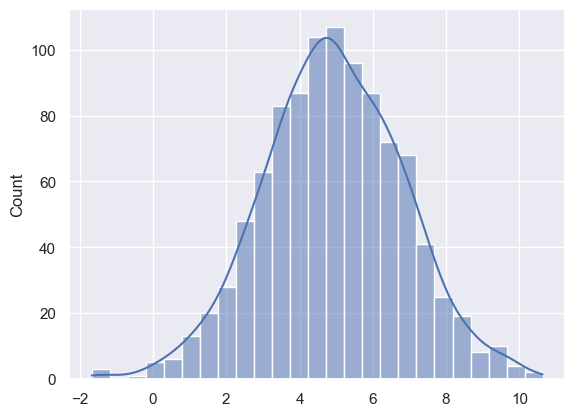

In [27]:
sns.histplot(scipy.stats.norm(5, scale=2).rvs(1000), kde=True);

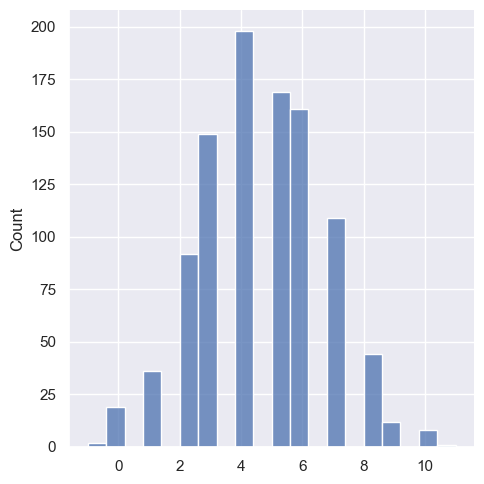

In [28]:
numbers= scipy.stats.norm(5, scale=2).rvs(1000)            
sns.displot(numbers.astype(int));

This is the gaussian or normal distribution.  In fact, we can't use it because it doesn't draw integers

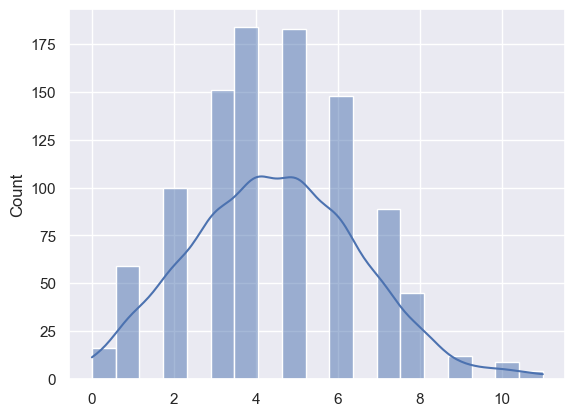

In [29]:
numbers = scipy.stats.norm(5, scale=2).rvs(1000)
sns.histplot(numbers.astype(int), kde=True); 

So we can use the gaussian and convert to integers, or we can draw from a uniform random distribution. That's plotted below. 

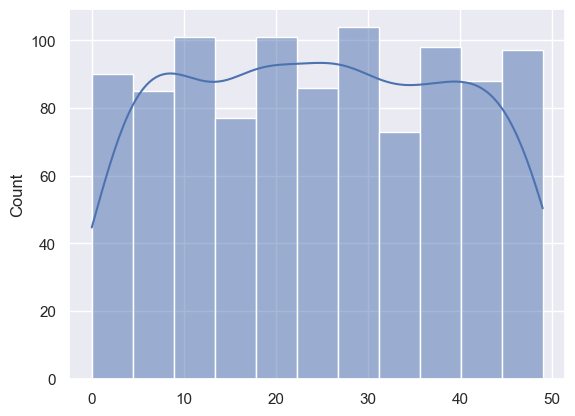

In [30]:
sns.histplot(scipy.stats.randint(0,50).rvs(1000), kde=True);

So we need to choose a distribution for our grid-search. Based on what area we want to search we can choose uniform or int-converted gaussian. If we choose guassian we can "target" it by adjusting the mean and std, similarly we can set the range on the uniform distribution (the low and high ends).  You can decide what you want for your distribution.

In [31]:
rand_params = { 'max_depth': scipy.stats.randint(2,100),            #Create random numbers of those hyper-parameters
               'min_samples_leaf':scipy.stats.randint(2,50),
               'min_samples_split':scipy.stats.randint(2,50)}

Note that we don't say "how many" samples to draw in the param grid. We will do that below when we create the RandomizedSearchCV object. You need to set the following
* estimator
* params
* n_iters (this decides how many times to sample from the distribution per setting)
* scoring
* cv

In [32]:
rand_search = RandomizedSearchCV(clf, rand_params, n_iter=10, scoring='f1',             #input the randomized numbers (as distributions)
                                 n_jobs=-1, cv=StratifiedKFold(n_splits=5))

In [33]:
rand_search.fit(X_train, y_train)       #we are looking for the hyperparameters(max_depth, min_samples_leaf, min_samples_split)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022D6072BC90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022D60A5BC10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022D60A2E690>},
                   scoring='f1')

In [34]:
rand_search.best_score_

0.888112403131786

In [35]:
rand_search.best_params_

{'max_depth': 53, 'min_samples_leaf': 6, 'min_samples_split': 14}

In [36]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=53, min_samples_leaf=6, min_samples_split=14)

## 4. Validate your classifier using

1. Learning Curve
2. Validation Curves (complexity graph)

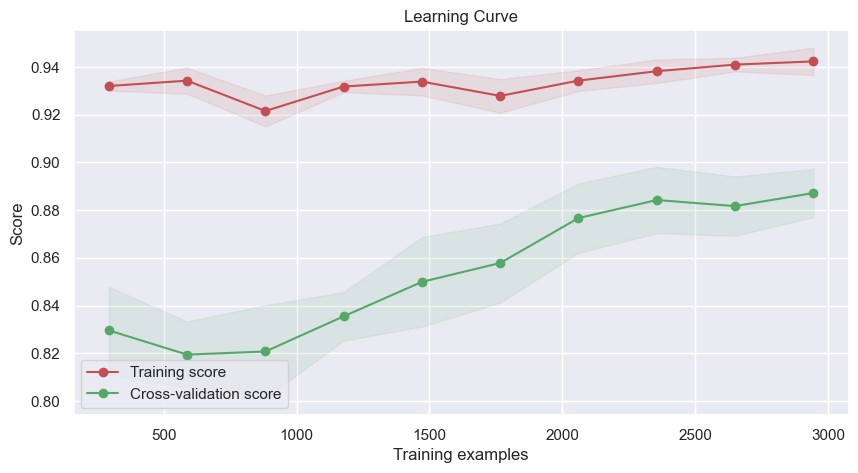

In [37]:
# plotting
from plotting import plot_learning_curve, plot_validation_curve

fig = plot_learning_curve(rand_search.best_estimator_, X_train, y_train,
                                   cv=StratifiedKFold(n_splits=5), train_sizes= np.linspace(.1,1.0,10), scoring='f1')


As we can see the cross validation score goes up (gets closer) to the training score if we increase the training samples, this means that if we add more data to our model the prediction model will behave better.

In [38]:
rand_search.best_params_

{'max_depth': 53, 'min_samples_leaf': 6, 'min_samples_split': 14}

In [39]:
k= StratifiedKFold(n_splits=5)

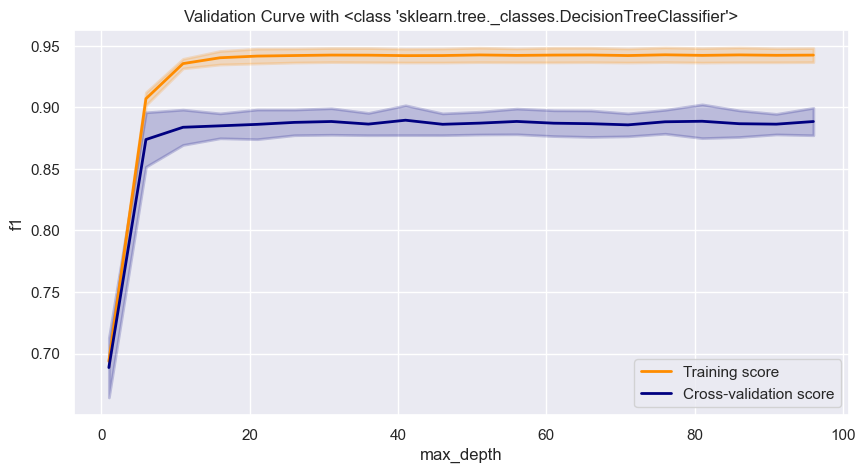

In [40]:
val1=plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=k,
                           param_range=np.arange(1,100,5), param_name="max_depth",
                           scoring="f1")


Here we have a overfitting example. After max_depth 15 more or less our  training score gets stacked and the cross validation score too, it will not inrease anymore. The model is overfitting. After that point we will just add noise to the system

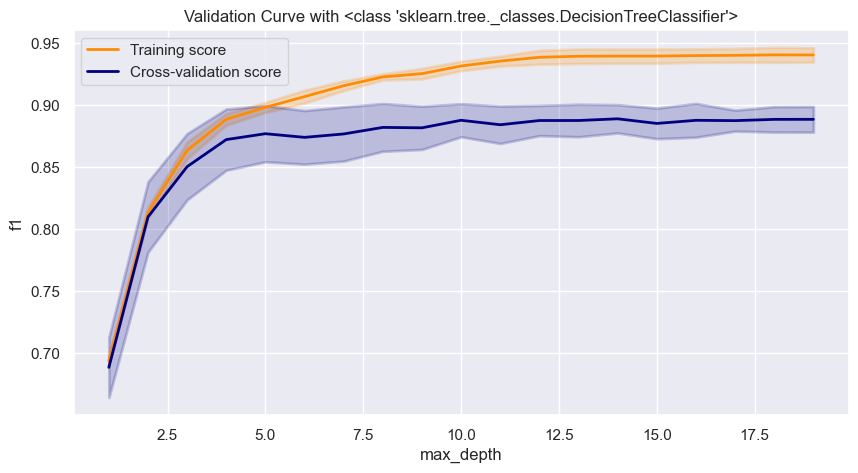

In [41]:
val1=plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=k,
                           param_range=np.arange(1,20,1), param_name="max_depth",
                           scoring="f1")

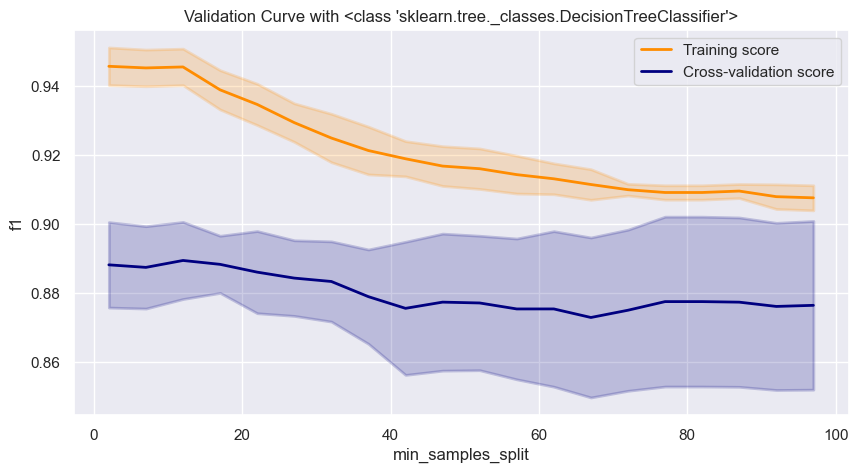

In [42]:
val1=plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=k,
                           param_range=np.arange(2,100,5), param_name="min_samples_split",
                           scoring="f1")

as mentioned before by increasing min_samples_split the depth changes (less data to go deeper in the tree).
A reasonable value could be around 30 as min split. The gap between the 2 curves looks too big (around min split=10)

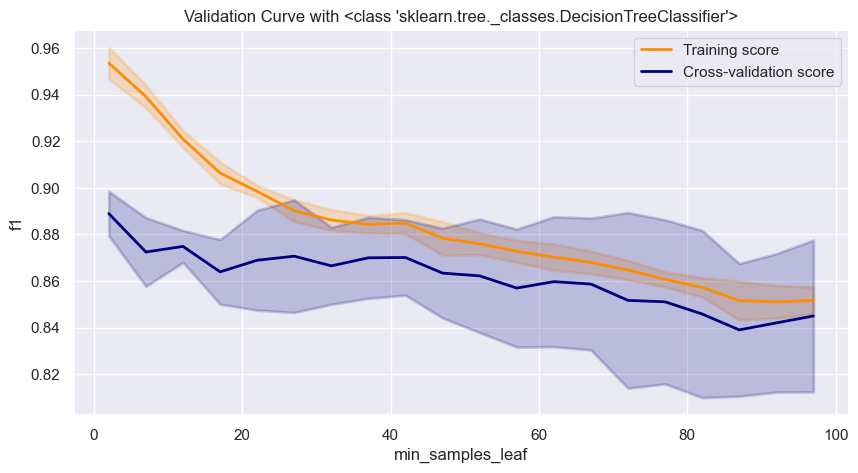

In [43]:
val1=plot_validation_curve(rand_search.best_estimator_, X_train, y_train, cv=k,
                           param_range=np.arange(2,100,5), param_name="min_samples_leaf",
                           scoring="f1")


Maybe i would choose min_samples_leaf around 12 (that 2nd elbow)

In [ ]:
min_samples_split=14        #It`s always picking up highest value in blue curve (GridSearch)
max_depth=7                 #It doesn`t consider the overfitting`
min_samples_leaf=12

#If we compare it with GridSearchCV results we see that GridSearch is always choosing the parametrs with highest score but not considering the overfitting.
#We need to be careful with this.
{'max_depth': 53, 'min_samples_leaf': 6, 'min_samples_split': 14}

In [45]:
my_fav_clf= DecisionTreeClassifier(min_samples_leaf=12, max_depth=7,min_samples_split=14)
my_fav_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=12, min_samples_split=14)

## 6. Looking at Feature Importances

Decision trees have a nice property that they can automatically sort your features by importance. This just naturally falls out from the gini coefficient or the information gain ratio (whichever one you used).  Therefore we can run a little code and actually see which features our model found to be the most important.


The code from Chris Albon below will help you do this, go ahead and run it.

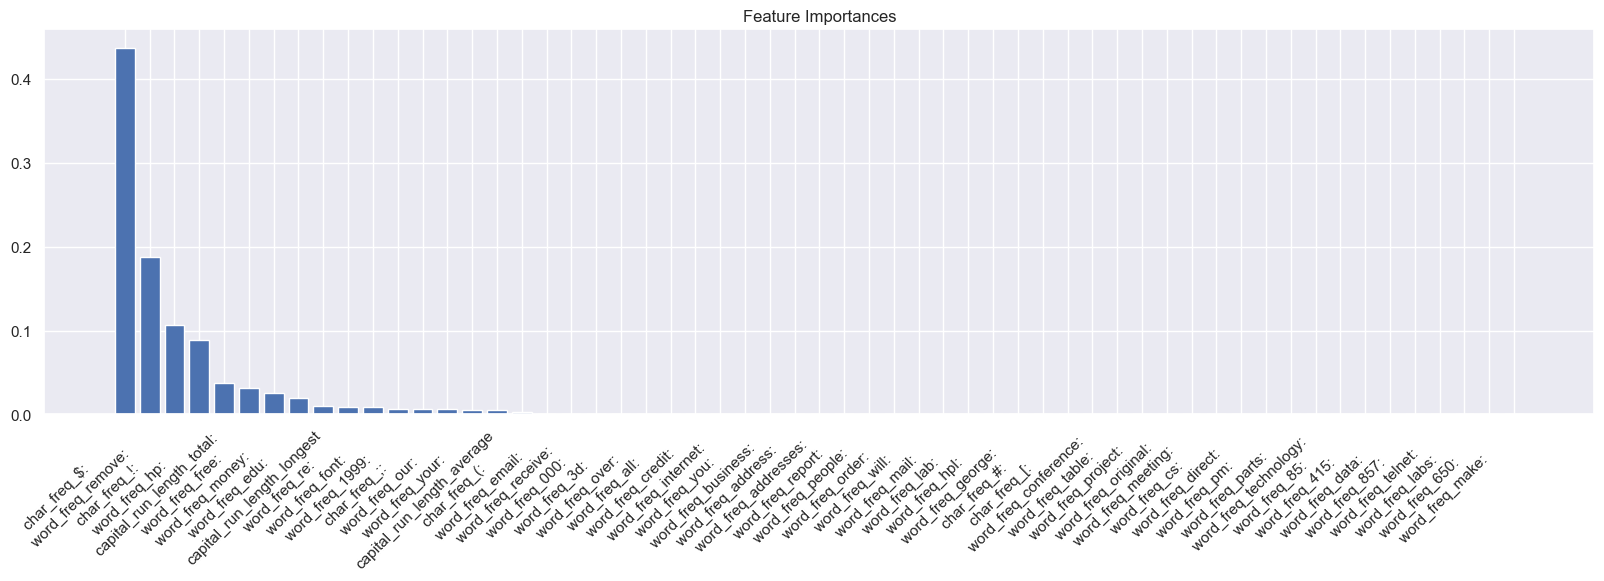

In [46]:
## https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

importances = my_fav_clf.feature_importances_

indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [names[i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');
